# Comparing results with baseline and chance level

In this notebook, we present how to compare the statistical performance of a
model to a minimal baseline.

Indeed, in the previous notebook, we compared the testing error by
taking into account the target distribution. A good practice is to compare
the testing error with a dummy baseline and the chance level. In
regression, we could use the `DummyRegressor` and predict the mean target
without using the data. The chance level can be determined by permuting the
labels and check the difference of result.

Therefore, we will conduct experiment to get the score of a model and the two
baselines. We will start by loading the California housing dataset.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

Across all evaluations, we will use a `ShuffleSplit` cross-validation.

In [4]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

We will start by running the cross-validation for the decision tree
regressor which is our model of interest. Besides, we will store the
testing error in a pandas series.

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

regressor = DecisionTreeRegressor()
result_regressor = cross_validate(regressor, data, target,
                                  cv=cv, scoring="neg_mean_absolute_error",
                                  n_jobs=2)

errors_regressor = pd.Series(-result_regressor["test_score"],
                             name="Regressor error")
errors_regressor

0     46.728264
1     46.695031
2     44.787760
3     44.253723
4     47.915984
5     44.655853
6     44.087781
7     44.987905
8     44.779326
9     44.754352
10    46.815380
11    45.878576
12    45.606363
13    45.233934
14    47.353843
15    44.416730
16    45.827953
17    47.605782
18    44.681919
19    47.117242
20    43.565666
21    45.586326
22    45.811983
23    46.587346
24    46.183400
25    45.682939
26    44.371751
27    46.317965
28    45.479809
29    47.495902
Name: Regressor error, dtype: float64

Then, we will evaluate our first baseline. This baseline is called a dummy
regressor. This dummy regressor will always predict the mean target computed
on the training. Therefore, the dummy regressor will never use any
information regarding the data `data`.

In [8]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()
result_dummy = cross_validate(dummy, data, target,
                              cv=cv, scoring="neg_mean_absolute_error",
                              n_jobs=2)
errors_dummy = pd.Series(-result_dummy["test_score"], name="Dummy error")
errors_dummy

0     90.713153
1     90.539353
2     91.941912
3     90.213912
4     92.015862
5     90.542490
6     89.757566
7     92.477244
8     90.947952
9     91.991373
10    92.023571
11    90.556965
12    91.539567
13    91.185225
14    92.298971
15    91.084639
16    90.984471
17    89.981744
18    90.547140
19    89.820219
20    91.768721
21    92.305556
22    90.503017
23    92.147974
24    91.386320
25    90.815660
26    92.216574
27    90.107460
28    90.620318
29    91.165331
Name: Dummy error, dtype: float64

Finally, we will evaluate the statistical performance of the second baseline.
This baseline will provide the statistical performance of the chance level.
Indeed, we will train a decision tree on some training data and evaluate the
same tree on data where the target vector has been randomized.

In [9]:
from sklearn.model_selection import permutation_test_score

regressor = DecisionTreeRegressor()
score, permutation_score, pvalue = permutation_test_score(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error",
    n_jobs=2, n_permutations=30)
errors_permutation = pd.Series(-permutation_score, name="Permuted error")
errors_permutation, score, pvalue

(0     129.068283
 1     129.354611
 2     128.899304
 3     129.006693
 4     128.879630
 5     129.232627
 6     130.144226
 7     128.765466
 8     129.197551
 9     129.525905
 10    129.300040
 11    129.696142
 12    129.065595
 13    129.443207
 14    129.503943
 15    129.451043
 16    128.924699
 17    128.940241
 18    128.873139
 19    129.532016
 20    129.123764
 21    129.159936
 22    129.019143
 23    129.582523
 24    129.304768
 25    129.632133
 26    129.578031
 27    129.328986
 28    128.896760
 29    129.279830
 Name: Permuted error, dtype: float64,
 -45.800137919896656,
 0.03225806451612903)

Finally, we plot the testing errors for the two baselines and the
actual regressor.

In [10]:
final_errors = pd.concat([errors_regressor, errors_dummy, errors_permutation],
                         axis=1)

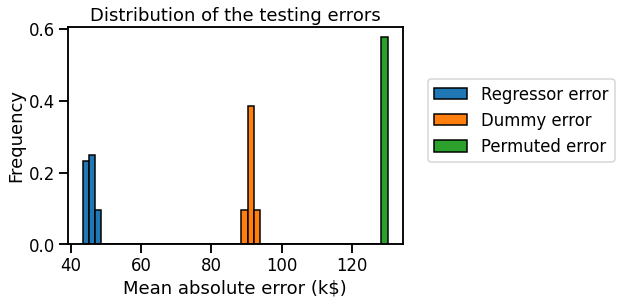

In [11]:
import matplotlib.pyplot as plt

final_errors.plot.hist(bins=50, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Distribution of the testing errors")

We see that even if the statistical performance of our model is far from
being good, it is better than the two baselines. Besides, we see that the
dummy regressor is better than a chance level regressor.

In practice, using a dummy regressor might be sufficient as a baseline.
Indeed, to obtain a reliable estimate the permutation of the target should
be repeated and thus this method is costly. However, it gives the true
chance level.